## Homework #6

* Due on **Tuesday, March-19-2024**, before class (~1pm)
* Please comment your code and pay attention to plotting, labeling styles
* Upload your code to the following dropbox link given in Moodle

### 1. Write a Python code to perform Monte Carlo simulations for the two-person coin flipping game discussed in class (30%)
- your choice for "head" is 50%，while the other player's choice for "head" is 11/30 (between 1/3 and 2/5), which is within the range we analyzed in class. Show that when you play more and more times, your expectation is negative. 
- now experiment with your code to show that your expectation is largely controlled by the choice of the other player.

In [59]:
import random

def one_flip_coin():
    outcomes = [1,0]
    I_probability = [1/2, 1/2]
    other_probability = [11/30, 19/30]
    return random.choices(outcomes, I_probability)[0], random.choices(outcomes, other_probability)[0]

def game(iteration):
    my_expectation = 0
    for _ in range(iteration):
        I_c, o_c = one_flip_coin()
        if I_c == 1 and o_c == 1:
            my_expectation += 3
        elif I_c == 0 and o_c == 0:
            my_expectation += 1
        else:
            my_expectation -= 2
    return my_expectation


if __name__ == "__main__":
    iteration_list = [10,1000,10000,100000]
    for iteration in iteration_list:
        string = ("after flipping {0} times, my expectation is {1}".format\
            (iteration, game(iteration=iteration)/iteration))
        print(string)

        
        



after flipping 10 times, my expectation is -1.4
after flipping 1000 times, my expectation is -0.186
after flipping 10000 times, my expectation is -0.1043
after flipping 100000 times, my expectation is -0.1328


### 2. Distributions of GDP and life expectancy (30%)

- Download the data file "gdp_data.txt" from Moodle and load it into Python using Pandas as a data frame
- Print out the head() of your data frame to screen, so you know clearly what column data sets you are working with
- Find out the number of continents in your data set, print out the results (recall in the in-class practice, we used the **.values** property of a column data, or, Series together with the **set()** function, what's a main property of a Python set?)
- Loop through the continents (ignore Oceanic), print out the mean, mode, median and standard deviation of life expectancy for each continent at year 2007
- Which continent(s) has (have) distribution(s) most likely Normal? Why? 
- Make a histogram of the life expectancy in year 2007, divide the data to different subgroups by continents, and compute the skewness of the distributions for each continent
- [**extra credit 10%**] Use the data for all the years (1952-2007) to make a scatter plot showing the relationship between (mean - median), and the skewness of the distributions. 

---task 1---
       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106 

---task 2---
{'Europe', 'Oceania', 'Asia', 'Africa', 'Americas'} 

---task 3---
[[Hint]]: we should calculate approximately by considering the values to "int" when we get mode,
    otherwise, there isn't any mode 
continent:  Europe
mean: 77.64859999999999, mode: [79], median: 78.60849999999999, standard deviation: 2.979812660160899
continent:  Asia
mean: 70.72848484848484, mode: [72], median: 72.396, standard deviation: 7.9637244706905665
continent:  Africa
mean: 54.80603846153845, mode: [42], median: 52.926500000000004, standard deviation: 9.630780671961794
continent:  Americas
mean: 73.60812

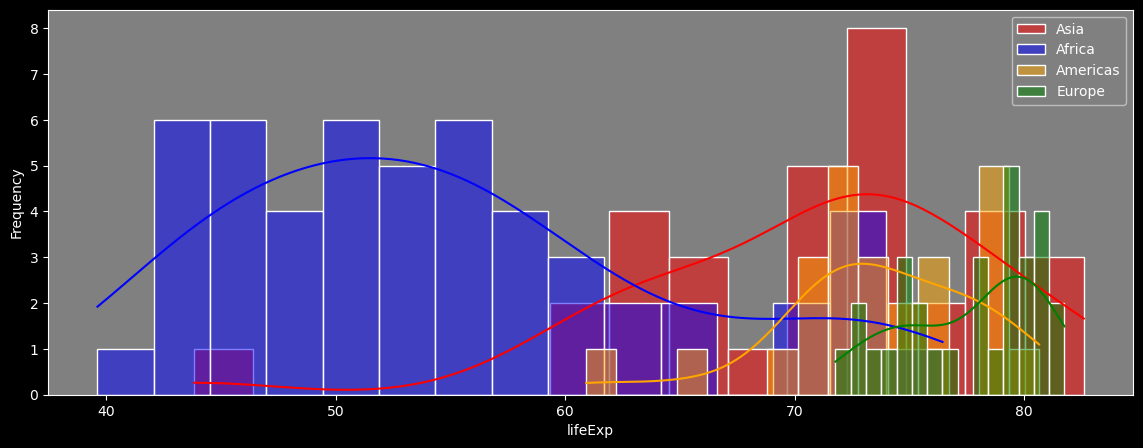

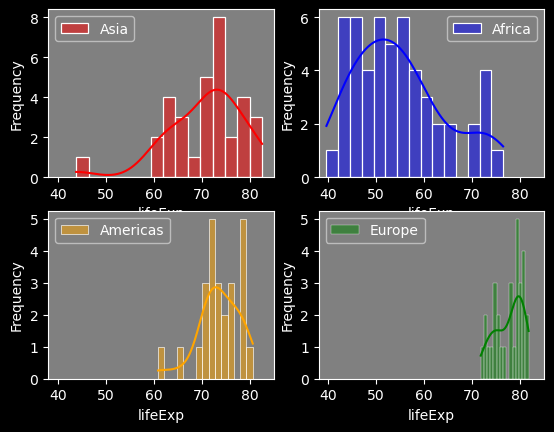



---task 6: extra credit---


Text(0, 0.5, 'skewness (1952~2007)')

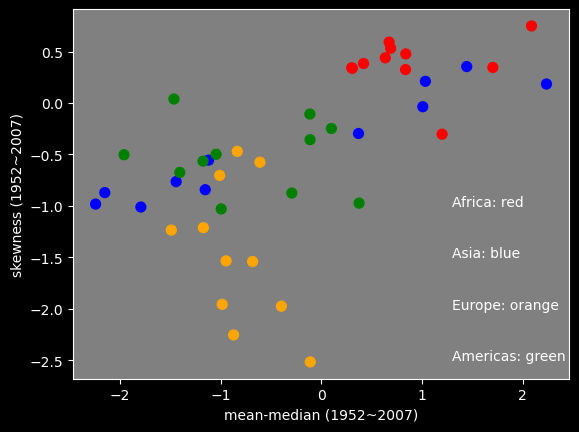

In [60]:
import pandas as pd
import numpy as np
import statistics # compute standard deviation
from collections import Counter # compute frequency
from scipy import stats  # compute similarity with Normal distribution
import matplotlib.pyplot as plt
import seaborn as sns

# BUG 1: owing to the data type in "lifeExp" is float, there is no specific mode 
# BUG 2: statistics.mode(int_cur_con_life) could not return multiple values
# BUG 3: .mode() only could be used to dataframe!!! [the same as standard deviation]

# BUG 4: function "distplot" will be removed and replaced by "histplot"!!! 
print("---task 1---")
gdp_life = pd.read_csv("./gdp_data.txt")
print(gdp_life.head(),"\n")

print("---task 2---")
con_va = gdp_life["continent"].values
nonrepective_con_va = set(con_va)
print(nonrepective_con_va,"\n")


print("---task 3---")
print("""[[Hint]]: we should calculate approximately by considering the values to "int" when we get mode,
    otherwise, there isn't any mode """)
life_2007 = gdp_life[gdp_life.year==2007]
valid_con = list(nonrepective_con_va)
valid_con.remove('Oceania')
con_similarity = []
for cur_con in valid_con:
    print("continent: ",cur_con)
    cur_con_life = life_2007[life_2007.continent==cur_con]["lifeExp"].dropna()

    int_cur_con_life = [int(item) for item in cur_con_life]
    # use Counter to compute frequency of each element
    counter = Counter(int_cur_con_life)
    max_count = max(counter.values())
    mode_values = [key for key, fre in counter.items() if fre == max_count]

    print("mean: {0}, mode: {1}, median: {2}, standard deviation: {3}".format\
        (cur_con_life.mean(), mode_values, cur_con_life.median(), statistics.stdev(cur_con_life)))
    
    k, similarity = stats.normaltest(cur_con_life)
    con_similarity.append((cur_con, similarity))


print("\n")
print("---task 4---")
ml_con = max(con_similarity, key=lambda x: x[1])
print("{0} has distribution most likely Normal".format(ml_con[0]))
string = "Returned value from notmaltest() is {0}, which is beyond 0.05. Meanwhile, {1}'s returned value is the maximum among 4 continents".\
    format(ml_con[1],ml_con[0])
print(string)


print("\n")
print("---task 5---")
plt.rcParams['axes.facecolor'] = 'gray' # 【背景颜色为灰色】
plt.figure(figsize=(14,5))

Asia_life = gdp_life['lifeExp'][(gdp_life.year==2007)&(gdp_life.continent=='Asia')]
sns.histplot(Asia_life, kde=True, color='red', bins=15, label='Asia')
print("The skewness of lifeExp in \"Asia\" is ",stats.skew(Asia_life))
Africa_life = gdp_life['lifeExp'][(gdp_life.year==2007)&(gdp_life.continent=='Africa')]
sns.histplot(Africa_life, kde=True, color='blue', bins=15, label='Africa')
print("The skewness of lifeExp in \"Africa\" is ",stats.skew(Africa_life))
Americas_life = gdp_life['lifeExp'][(gdp_life.year==2007)&(gdp_life.continent=='Americas')]
sns.histplot(Americas_life, kde=True, color='orange', bins=15, label='Americas')
print("The skewness of lifeExp in \"Americas\" is ",stats.skew(Americas_life))
Europe_life = gdp_life['lifeExp'][(gdp_life.year==2007)&(gdp_life.continent=='Europe')]
sns.histplot(Europe_life, kde=True, color='green', bins=15, label='Europe')
print("The skewness of lifeExp in \"Europe\" is ",stats.skew(Europe_life))
plt.legend()
plt.ylabel('Frequency')
plt.show()


plt.subplot(2,2,1)
plt.xlim(38,85)
sns.histplot(Asia_life, kde=True, color='red', bins=15, label='Asia')
plt.legend()
plt.xlabel("lifeExp")
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.xlim(38,85)
sns.histplot(Africa_life, kde=True, color='blue', bins=15, label='Africa')
plt.legend()
plt.xlabel("lifeExp")
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.xlim(38,85)
sns.histplot(Americas_life, kde=True, color='orange', bins=15, label='Americas')
plt.legend()
plt.xlabel("lifeExp")
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.xlim(38,85)
sns.histplot(Europe_life, kde=True, color='green', bins=15, label='Europe')
plt.legend()
plt.xlabel("lifeExp")
plt.ylabel('Frequency')
plt.show()



print("\n")
print("---task 6: extra credit---")
color_dict = {'Africa':"red", 'Asia':"blue",'Europe':"orange", 'Americas':"green"}
interval_list = []
skewness_list = []
color_list = []
for cur_con in valid_con:    
    for year in range(1952,2007):
        cur_life = gdp_life["lifeExp"][(gdp_life.year==year) & (gdp_life.continent==cur_con)].dropna()
        if len(cur_life)!=0:
            interval_list.append(cur_life.mean()-cur_life.median())
            skewness_list.append(stats.skew(cur_life))
            color_list.append(color_dict[cur_con])
plt.scatter(interval_list, skewness_list, 50, color=color_list)
plt.text(1.3,-1.0,'Africa: red')    
plt.text(1.3,-1.5,'Asia: blue')    
plt.text(1.3,-2.0,'Europe: orange')    
plt.text(1.3,-2.5,'Americas: green')    

plt.xlabel("mean-median (1952~2007)")
plt.ylabel("skewness (1952~2007)")



### 3. Solar wind versus geomagnetic activity  (40%)

Download the data file "OMNI_2003.xls" from Moodle, which is a one-hour solar wind and geomagnetic activity data for the year of 2003. The data file is generated in NASA's cdaweb OMNI data base (https://omniweb.gsfc.nasa.gov/html/ow_data.html), combined from multiple space-based and ground-based measurments. For the interplanetary magnetic field (IMF) components Bx By and Bz:

- X-component pointing from the Earth to the Sun
- Y-component pointing from Dawn to Dusk
- Z-component pointing from the Center of the Earth towards the North Pole

These components basically control the dynamic variation of the space environment. The "KP" index in the data is called the "Planetary-K" index which describe Now let's try some data analysis to learn some space sciences.


- Load the excel file into Python as a Pandas data frame, pay attention to the number of rows you need to skip (use the skiprows = # option)
- Print out all the names of the columns so you know exactly what column data you are working with 
- Create a new column named "AE" (auroral index) by computing (AU - AL), generate a scatter plot to show the relationship between KP and AE. By looking at the plot, what do you think is the relationship between KP and AE?
- What's the maximum value of KP in 2003? What time did the max KP value occur?
- What are the mean, median, max, min values of IMF Bx? 
- Generate a histogram of the interplanetary magnetic field (IMF) Bx, By and Bz, use at least 80 bins
- Test whether the distributions of Bx, By and Bz are Normal or not. Print out the results
- How many modes are there in the Bx data? How many modes are there in the By data? (hint: use the .mode() function)
- Now divide the Bx data into two groups (By>0 and By<0), and use histograms to show the distribution of Bx for each By-group. 
- [**extra credit 10%**] Do your own research and try to explain either one of the following two phenomena: 
    - what happened during the maximum KP time in 2003; or
    - why there are two modes in Bx and By but not Bz.
    


---all the names of column--- 
 Index(['Time', 'Bx', 'By', 'Bz', 'T', 'N', 'V', 'F107', 'KP', 'Dst', 'AL',
       'AU'],
      dtype='object') 

---The relationship between KP and AE---


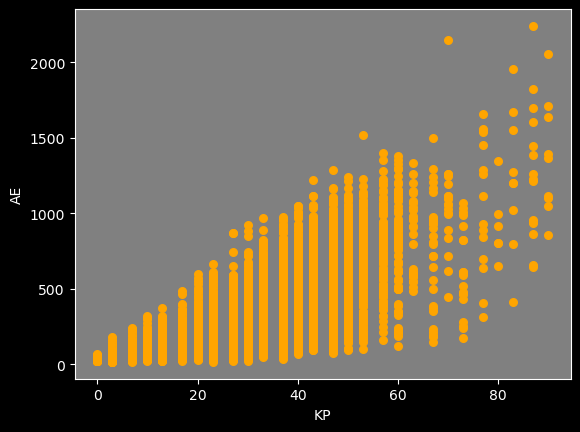



The maximum value of KP occurs in 2003 is 90
The exact time is  [' 2003-10-29T06:30:00.000Z' ' 2003-10-29T07:30:00.000Z'
 ' 2003-10-29T08:30:00.000Z' ' 2003-10-30T18:30:00.000Z'
 ' 2003-10-30T19:30:00.000Z' ' 2003-10-30T20:30:00.000Z'
 ' 2003-10-30T21:30:00.000Z' ' 2003-10-30T22:30:00.000Z'
 ' 2003-10-30T23:30:00.000Z']


mean of Bx:  0.05574200913242019
median of Bx:  0.3
max of Bx:  19.0
min of Bx:  -38.9


---Generate histogram of Bx, By, Bz---


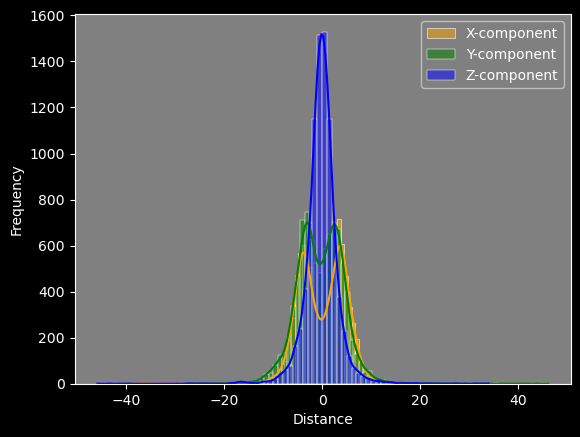

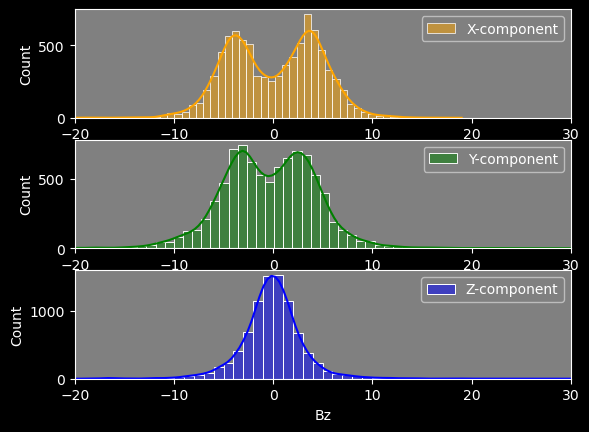

similarity 5.299101779614054e-183 Bx does't look Gaussian
similarity 1.73057348768462e-225 By does't look Gaussian
similarity 0.0 Bz does't look Gaussian
Number of modes in Bx is  1
Number of modes in By is  1


---Divide Bx to two groups in terms of whether By is positive---


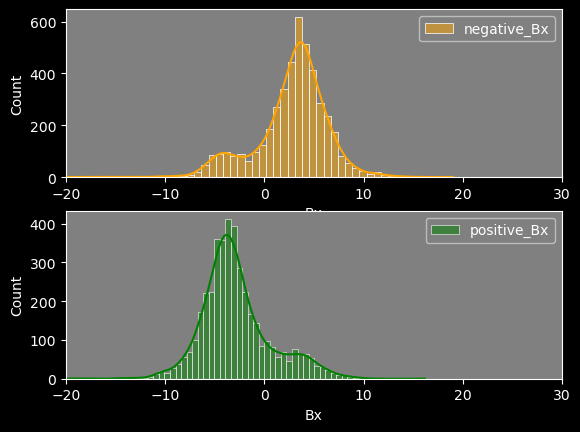

In [58]:
import pandas as pd
from scipy import stats

space = pd.read_excel("./OMNI_2003.xls",skiprows=73) # skip the first 73 rows
print("---all the names of column--- \n",space.columns,"\n")
space["AE"] = space["AU"] - space["AL"]

print("---The relationship between KP and AE---")
plt.scatter(space["KP"], space["AE"], 30, color="orange")
plt.xlabel("KP")
plt.ylabel("AE")
plt.show()

print("\n")
print("The maximum value of KP occurs in 2003 is", max(space["KP"]))
print("The exact time is ",space["Time"][space["KP"]==max(space["KP"])].values)

print("\n")
Bx = space["Bx"]
By = space["By"]
Bz = space["Bz"]
print("mean of Bx: ",Bx.mean())
print("median of Bx: ",Bx.median())
print("max of Bx: ",Bx.max())
print("min of Bx: ",Bx.min())

print("\n")
print("---Generate histogram of Bx, By, Bz---")
sns.histplot(Bx, kde=True, color='orange', bins=80, label='X-component')
sns.histplot(By, kde=True, color='green', bins=80, label='Y-component')
sns.histplot(Bz, kde=True, color='blue', bins=80, label='Z-component')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.subplot(3,1,1)
plt.xlim(-20,30)
sns.histplot(Bx, kde=True, color='orange', bins=80, label='X-component')
plt.legend()
plt.subplot(3,1,2)
plt.xlim(-20,30)
sns.histplot(By, kde=True, color='green', bins=80, label='Y-component')
plt.legend()
plt.subplot(3,1,3)
plt.xlim(-20,30)
sns.histplot(Bz, kde=True, color='blue', bins=80, label='Z-component')
plt.legend()
plt.show()


k1, value_x = stats.normaltest(Bx.dropna())
if value_x > 0.05:
    print("similarity",value_x,"Bx looks Gaussian")
else:
    print("similarity",value_x,"Bx does't look Gaussian")
k2, value_y = stats.normaltest(By.dropna())
if value_y > 0.05:
    print("similarity",value_y,"By looks Gaussian")
else:
    print("similarity",value_y,"By does't look Gaussian")

k3, value_z = stats.normaltest(Bz.dropna())
if value_z > 0.05:
    print("similarity",value_z,"Bz looks Gaussian")
else:
    print("similarity",value_z,"Bz does't look Gaussian")

print("Number of modes in Bx is ", len(Bx.mode()))
print("Number of modes in By is ",len(By.mode()))

print("\n")
print("---Divide Bx to two groups in terms of whether By is positive---")
negative_index = (By<0)
ne_Bx = Bx[negative_index]
positive_index = (By>0)
po_Bx = Bx[positive_index]
plt.subplot(2,1,1)
plt.xlim(-20,30)
sns.histplot(ne_Bx, kde=True, color='orange', bins=80, label='negative_Bx')
plt.legend()
plt.subplot(2,1,2)
plt.xlim(-20,30)
sns.histplot(po_Bx, kde=True, color='green', bins=80, label='positive_Bx')
plt.legend()
plt.show()
